In [ ]:
import cv2 as cv
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from torchvision.datasets import DatasetFolder
from models.k_means import KMeans
import matplotlib.pyplot as plt
from torchvision.transforms import v2

In [35]:
transform = v2.Compose(
    [
        v2.ToImage(), 
        v2.Resize((408,300)),
        v2.ToDtype(torch.float32, scale=True)
    ])
train = DatasetFolder("data", lambda image: cv.cvtColor(cv.imread(image), cv.COLOR_BGR2RGB), transform=transform, extensions=".jpg") # Apes and Owls
train_data = DataLoader(dataset=train, batch_size=len(train), shuffle=False)

In [ ]:
transform = v2.Compose(
    [
        v2.ToImage(), 
        v2.Resize((408,300)),
        v2.ToDtype(torch.float32, scale=True)
    ])
train = DatasetFolder("data", lambda image: cv.cvtColor(cv.imread(image), cv.COLOR_BGR2RGB), transform=transform, extensions=".jpg") # Apes and Owls
train_data = DataLoader(dataset=train, batch_size=len(train), shuffle=False)

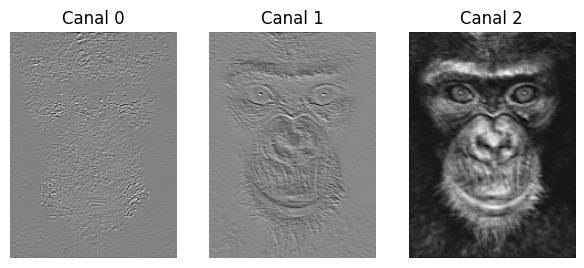

In [36]:
from utils.feature_extractor import extract_resnet_features
image = train.__getitem__(0)
image_features, features = extract_resnet_features(image[0].unsqueeze(0))
image_features = image_features.squeeze(0)
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 6, i+1)
    plt.imshow(image_features[i].cpu(), cmap='gray')
    plt.axis('off')
    plt.title(f'Canal {i}')
plt.show()

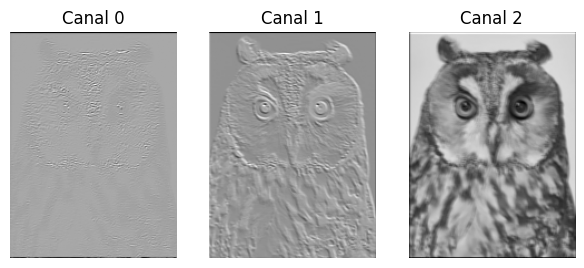

In [37]:
from utils.feature_extractor import extract_resnet_features
image = train.__getitem__(32)
image_features, features = extract_resnet_features(image[0].unsqueeze(0))
image_features = image_features.squeeze(0)
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 6, i+1)
    plt.imshow(image_features[i].cpu(), cmap='gray')
    plt.axis('off')
    plt.title(f'Canal {i}')
plt.show()

In [38]:
images, labels = next(iter(train_data))  # images: [B, C, H, W]
images.shape

torch.Size([50, 3, 408, 300])

In [ ]:
_, features = extract_resnet_features(images)
features = features.squeeze()
features.shape

In [46]:
n_cluster = 2
model = KMeans(n_cluster=n_cluster, max_iter=10)
model.fit(X=features)


iter: 0
iter: 1
iter: 2
iter: 3
iter: 4
Convergiu na iteração: 4


In [47]:
labels = model.predict(features)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

Cluster 0 → 18 imagens


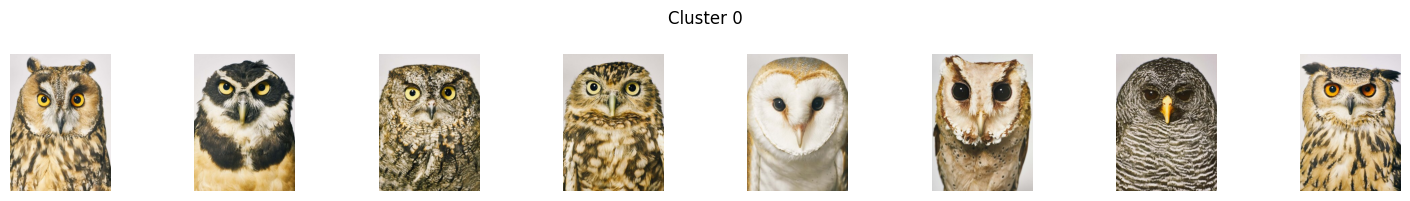

Cluster 1 → 32 imagens


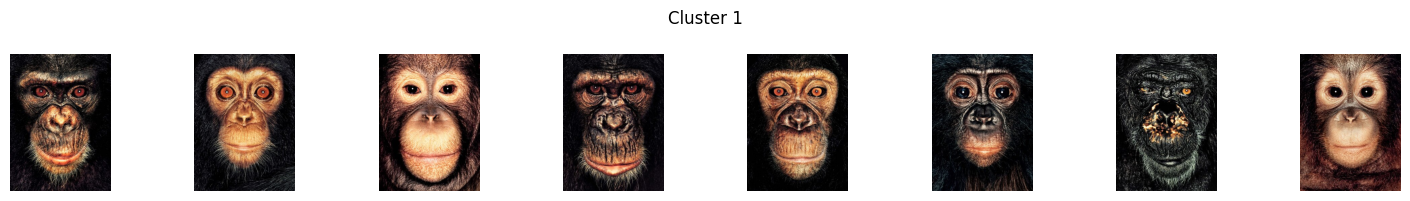

In [ ]:
def show_clusters(images, cluster_labels, n_clusters, max_images=10):
    for cluster_id in range(n_clusters):

        idxs = (cluster_labels == cluster_id).nonzero()[0] # mascara 
        print(f"Cluster {cluster_id} → {len(idxs)} imagens")

        plt.figure(figsize=(15, 2))
        for i, idx in enumerate(idxs[:max_images]):
            img = images[idx]
            img = img.permute(1, 2, 0)
            plt.subplot(1, max_images, i + 1)
            plt.imshow(img.cpu())
            plt.axis('off')
        plt.suptitle(f"Cluster {cluster_id}")
        plt.tight_layout()
        plt.show()
        
show_clusters(images, labels, n_clusters=2, max_images=8)